### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Loading the data

In [2]:
dataset = pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Text(0.5, 1.0, 'Mushroom - Edible-e/Poisonous-p')

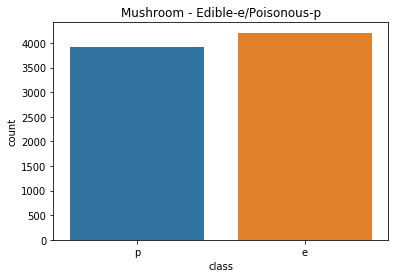

In [4]:
sns.countplot(data=dataset, x="class").set_title("Mushroom - Edible-e/Poisonous-p")

In [5]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the table above it can be seen that the column "veil-type" is not contributing to the data. So removing it.

In [6]:
dataset.drop('veil-type',axis=1,inplace=True)

### Encoding categorical features

The data is categorial so converting it with OneHotEncoder

In [7]:
for i in dataset.columns:
    dataset[i]=pd.get_dummies(dataset[i])   

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   uint8
 1   cap-shape                 8124 non-null   uint8
 2   cap-surface               8124 non-null   uint8
 3   cap-color                 8124 non-null   uint8
 4   bruises                   8124 non-null   uint8
 5   odor                      8124 non-null   uint8
 6   gill-attachment           8124 non-null   uint8
 7   gill-spacing              8124 non-null   uint8
 8   gill-size                 8124 non-null   uint8
 9   gill-color                8124 non-null   uint8
 10  stalk-shape               8124 non-null   uint8
 11  stalk-root                8124 non-null   uint8
 12  stalk-surface-above-ring  8124 non-null   uint8
 13  stalk-surface-below-ring  8124 non-null   uint8
 14  stalk-color-above-ring    8124 non-null 

In [9]:
X = dataset.drop('class', axis=1)
y = dataset['class']

### Splitting the data into test and train set

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

#### Random forest Classifier model

In [11]:
rfcl_model = RandomForestClassifier().fit(X_train, y_train)

### Predicting the output

In [12]:
y_pred = rfcl_model.predict(X_test)

### Analysing the results

In [13]:
accuracy_score(y_test, y_pred)

0.9913863822805579

Text(0.5, 15.0, 'Predicted label')

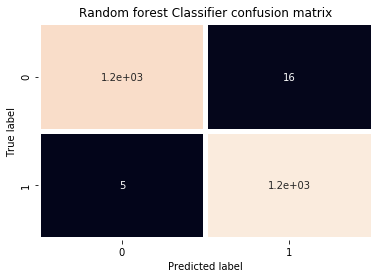

In [14]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=4, cbar =None)
plt.title('Random forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

The Random Forest Classifier has 99% accuracy which is pretty good